# Initial Exploratory Analysis of the Feedback Prize - ELL Data
In this notebook we will quickly explore the essay data that are part of the Feedback Prize - ELL competition.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


In [2]:
# Import data and show first lines
filepath = '../input/feedback-prize-english-language-learning/train.csv'
df = pd.read_csv(filepath, index_col='text_id')
df.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
text_id,,,,,,,
0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


At first we will just concentrate on the total score, which is simply calculated as the sum of the individual category scores.

In [3]:
# Calculate cumulative score using all category scores
df['sum_score'] = df.sum(axis=1, numeric_only=True)
df.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,sum_score
text_id,,,,,,,,
0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0
0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5
00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0
003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0
0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5


In [4]:
# Print shape of the dataframe
df.shape

(3911, 8)

### Essay Length Features
Now, let's add the two features that we want to examine:
1. The length of each essay as character cound
2. The length of each essay as word count

In [5]:
# Add text length (characters)
df["text_len"] = df['full_text'].str.len()

# Add text length (words) - replace \n with space
df["no_of_words"] = df['full_text'].map(lambda x: len(x.replace("\n", " ").split()))

## Data Quantity and Quality

In [6]:
# No missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3911 entries, 0016926B079C to FFED00D6E0BD
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_text    3911 non-null   object 
 1   cohesion     3911 non-null   float64
 2   syntax       3911 non-null   float64
 3   vocabulary   3911 non-null   float64
 4   phraseology  3911 non-null   float64
 5   grammar      3911 non-null   float64
 6   conventions  3911 non-null   float64
 7   sum_score    3911 non-null   float64
 8   text_len     3911 non-null   int64  
 9   no_of_words  3911 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 336.1+ KB


In [7]:
df.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,sum_score,text_len,no_of_words
text_id,,,,,,,,,,
0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0,1387,261
0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5,2635,533
00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0,1663,320
003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0,3973,728
0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5,1326,234


## Distribution of the cumulative scores
This seems to be almost normally distributed.

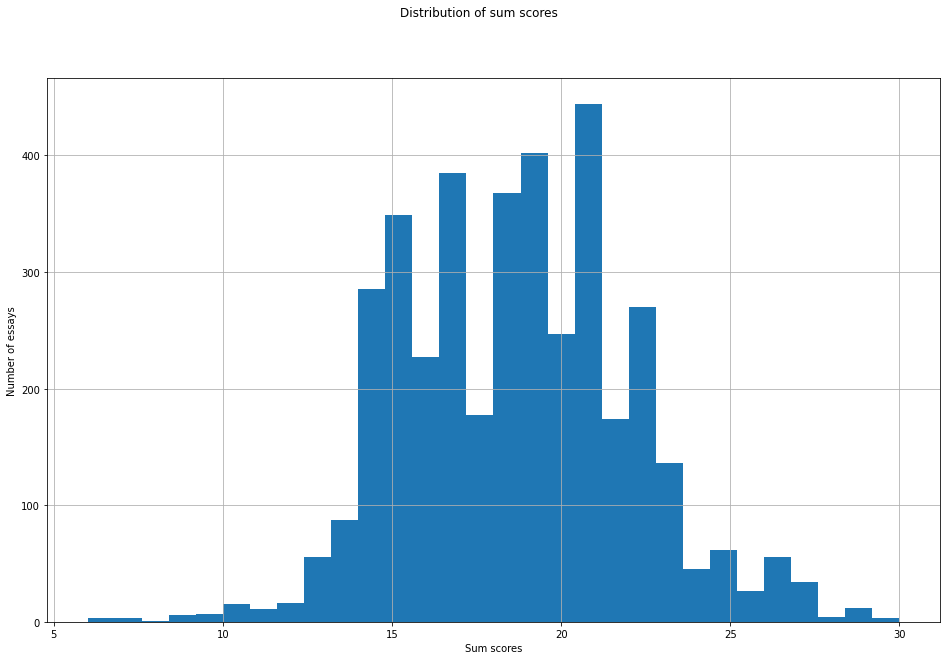

In [8]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of sum scores")
plt.xlabel("Sum scores")
plt.ylabel("Number of essays")
df["sum_score"].hist(bins=30);

## Distribution of Essay Length (characters and words)

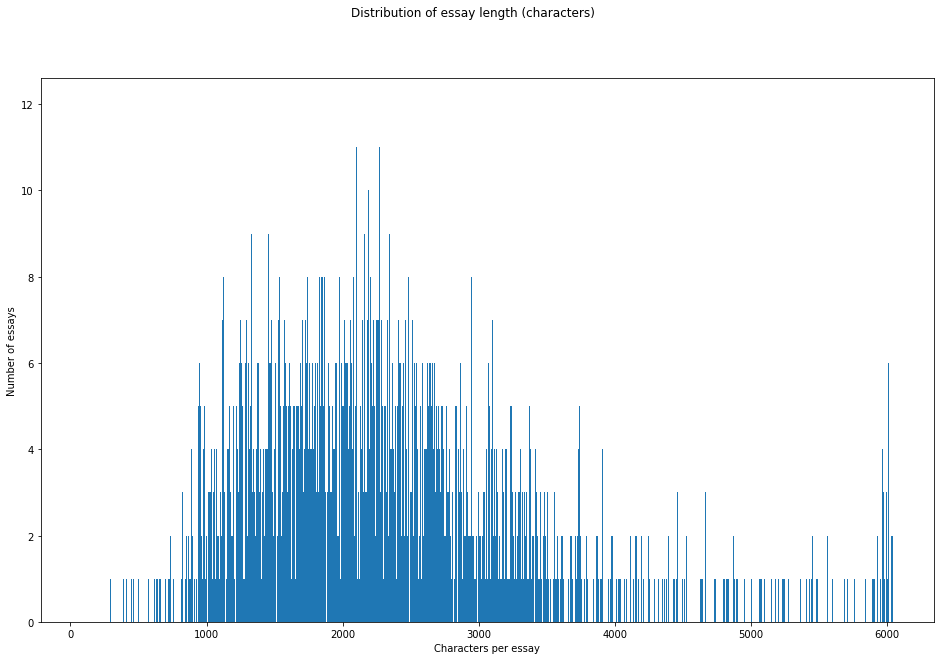

In [9]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of essay length (characters)")
plt.xlabel("Characters per essay")
plt.ylabel("Number of essays")
q_len = plt.hist(df["text_len"], bins=2000,log=False)

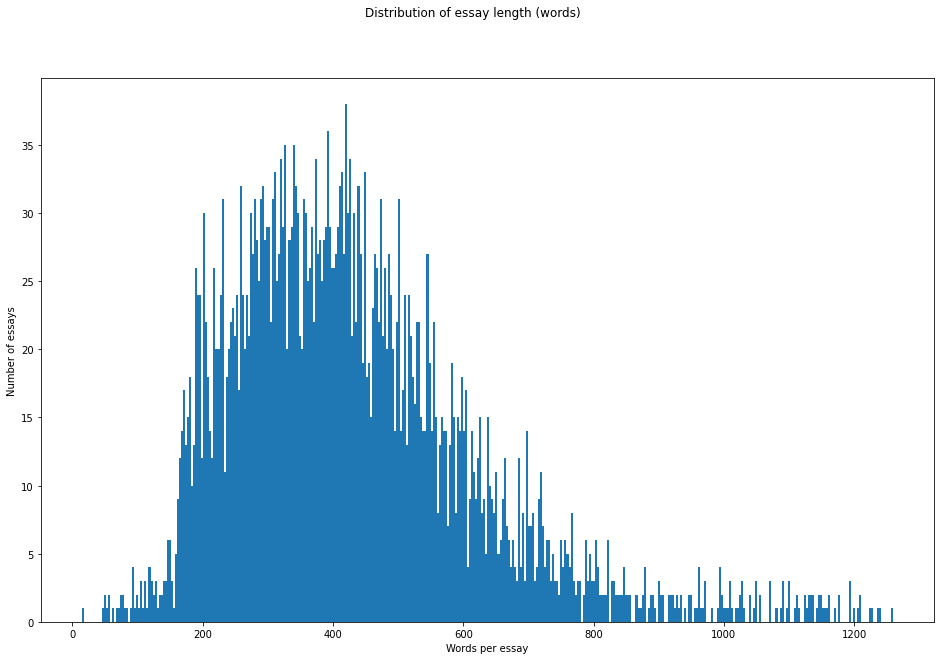

In [10]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of essay length (words)")
plt.xlabel("Words per essay")
plt.ylabel("Number of essays")
q_len = plt.hist(df["no_of_words"], bins=400,log=False)

## Is Essay Length predictive?

To answer this let's overlay the distributions of length (in terms of words and characters respectively) for both high and low score essays.

We can see that there is a higher proportion of short essays that score badly.

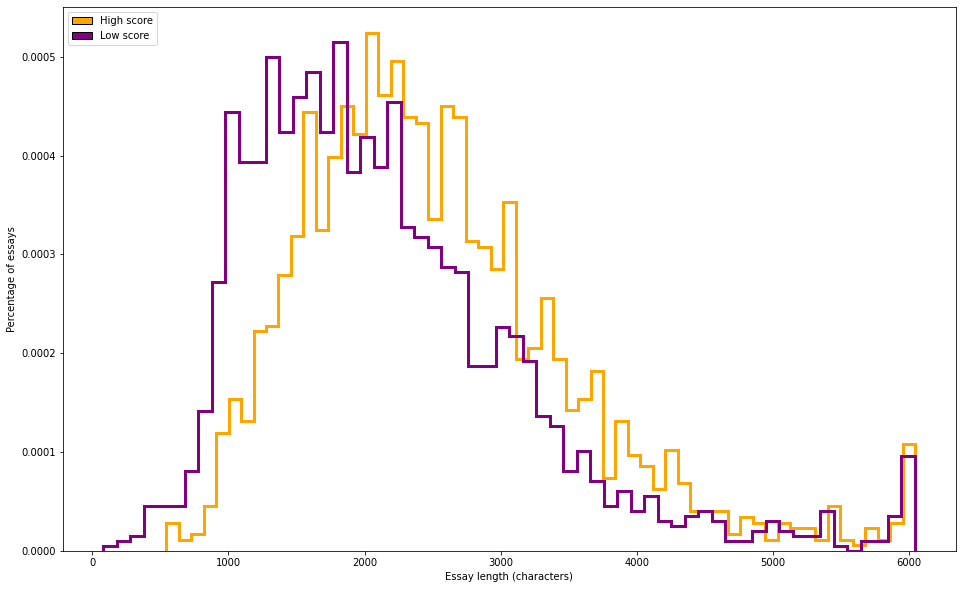

In [11]:
high_score = df["sum_score"] > df["sum_score"].median()

ax = df[high_score]["text_len"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="orange",
    linewidth=3,
    grid=False,
    figsize=(16, 10),
)

df[~high_score]["text_len"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="purple",
    linewidth=3,
    grid=False,
)

handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["orange", "purple"]
]
labels = ["High score", "Low score"]
plt.legend(handles, labels)
ax.set_xlabel("Essay length (characters)")
ax.set_ylabel("Percentage of essays");

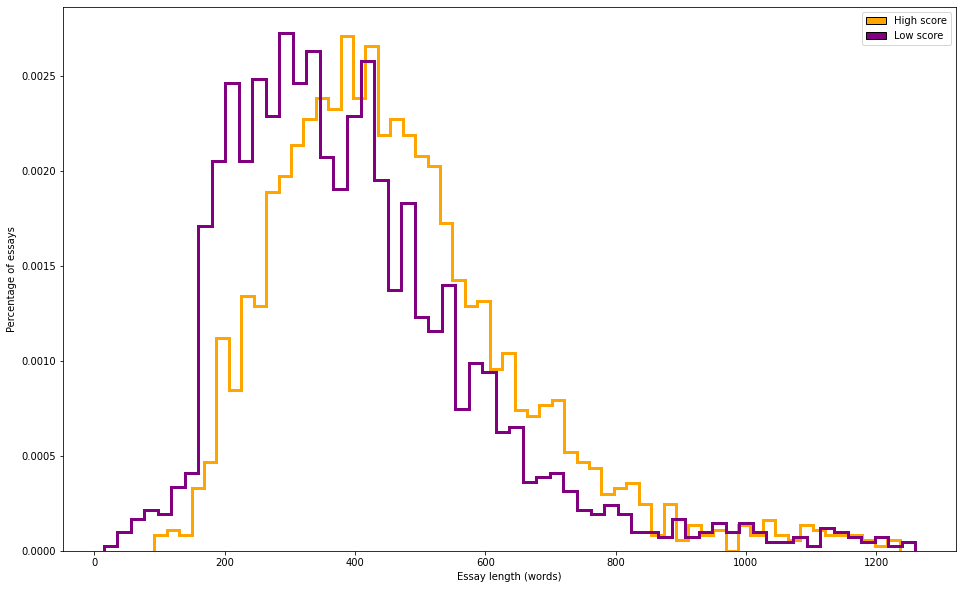

In [12]:
ax = df[high_score]["no_of_words"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="orange",
    linewidth=3,
    grid=False,
    figsize=(16, 10),
)

df[~high_score]["no_of_words"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="purple",
    linewidth=3,
    grid=False,
)

handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["orange", "purple"]
]
labels = ["High score", "Low score"]
plt.legend(handles, labels)
ax.set_xlabel("Essay length (words)")
ax.set_ylabel("Percentage of essays");

### Trend of Length vs Score

Let's plot the length of the essays (characters and words) as a function of the cumulative score that each essay was awared.

It seems that essays that use more words (and characters) tend to receive higher scores. Essay length can thus be used as a feature for our model! 

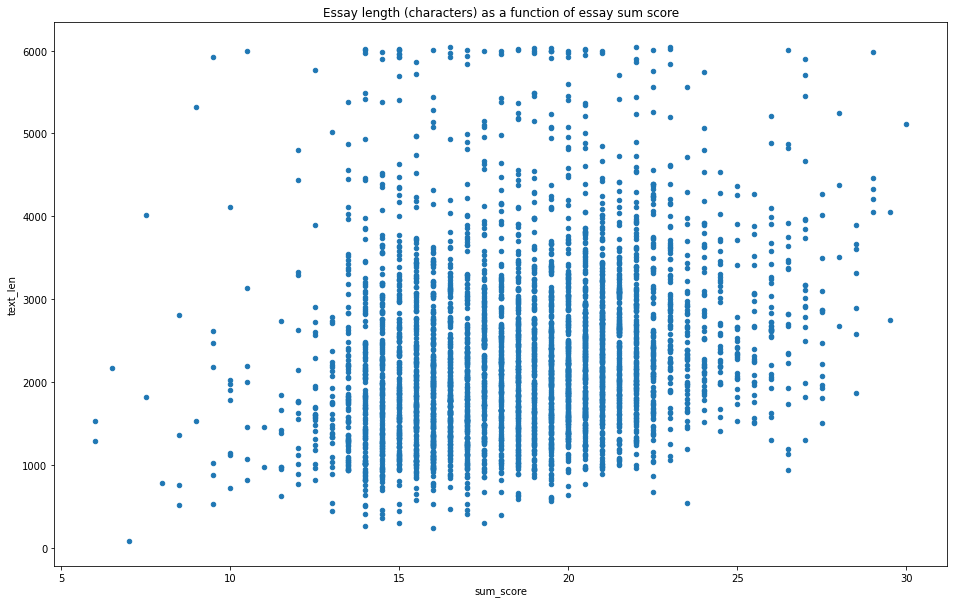

In [13]:
scatter = df[['sum_score', 'text_len']].plot(x="sum_score", y="text_len", 
                                                               kind="scatter",
                                                              figsize=(16, 10))
ax.set_xlabel("Sum Score")
ax.set_ylabel("Essay length (characters)")
scatter.set_title("Essay length (characters) as a function of essay sum score");

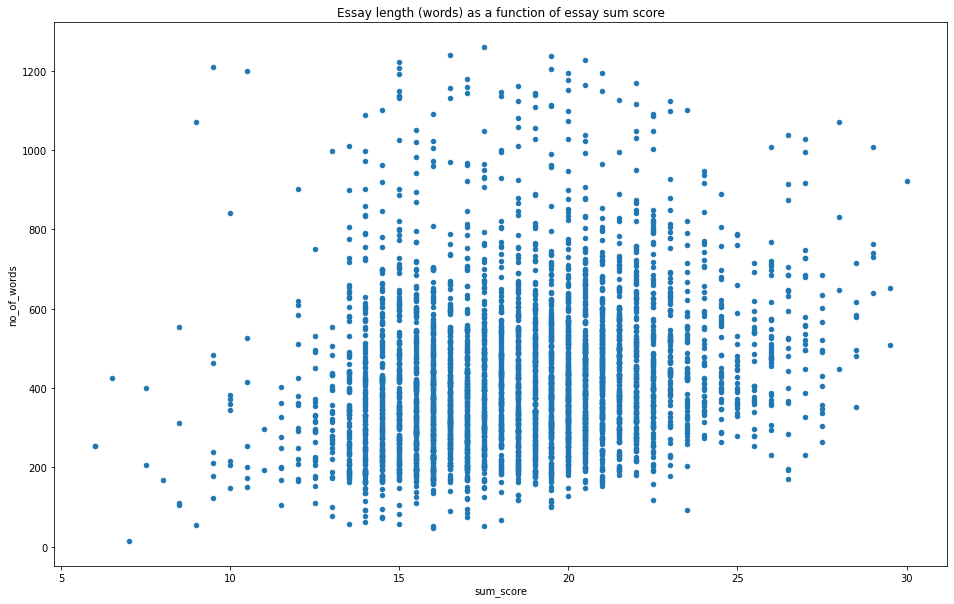

In [14]:
scatter = df[['sum_score', 'no_of_words']].plot(x="sum_score", y="no_of_words", 
                                                               kind="scatter",
                                                              figsize=(16, 10))
ax.set_xlabel("Sum Score")
ax.set_ylabel("Essay length (words)")
scatter.set_title("Essay length (words) as a function of essay sum score");